In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import seaborn as sns

In [2]:
ftalany = pd.read_excel('ftalany.xlsx', sheet_name=['X_train', 'y_train', 'X_test', 'y_test'])
scaler = StandardScaler()
Xt = ftalany['X_train']
Yt = ftalany['y_train']
Xv = ftalany['X_test']
Yv = ftalany['y_test']
Xt = Xt.rename(columns={"qc-": "qc"})

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'canberra']
rmse_cv_scores = {}
cv = KFold(n_splits = 23, shuffle = True, random_state = 1)

for metric in metrics:
    rmse_cv_scores[metric] = []
    for k in range(2, 23):
        knn_model = KNeighborsRegressor(n_neighbors=k, metric=metric)
        mse_scores = cross_val_score(knn_model, Xt, Yt, cv=cv, scoring='neg_mean_squared_error')
        rmse = np.sqrt(-mse_scores.mean())
        rmse_cv_scores[metric].append(rmse)


{'euclidean': [0.18648818327175587,
  0.18660088553672996,
  0.202560259083026,
  0.21237858952106387,
  0.21890618661574496,
  0.22425142729576575,
  0.24577422211061123,
  0.25270702631443576,
  0.2645061948317049,
  0.27028632036535605,
  0.2948345067606768,
  0.314150710068401,
  0.3372127347674644,
  0.35867548132318083,
  0.37734687030170866,
  0.39196887925164453,
  0.40270897864689265,
  0.4262756563588203,
  0.44730450857475645,
  0.47805717062304104,
  0.5062292189796638],
 'manhattan': [0.20342248630567517,
  0.16463123760737292,
  0.19868800133626596,
  0.20929914746705205,
  0.21752437930445281,
  0.2234257633538651,
  0.23924907927961042,
  0.24494279563753027,
  0.2593752374372931,
  0.2703789097014681,
  0.2980421348543705,
  0.3152554924353843,
  0.33759738724732463,
  0.3532592406345796,
  0.3771805247432378,
  0.3981352983441349,
  0.40359449060106356,
  0.42606515789433946,
  0.4500988418995853,
  0.478057170623041,
  0.5062292189796638],
 'chebyshev': [0.2044138981

Wybieram wartość n_splits równą 23 (tyle ile próbek w zbiorze treningowym) ze względu na małą ilość próbek.

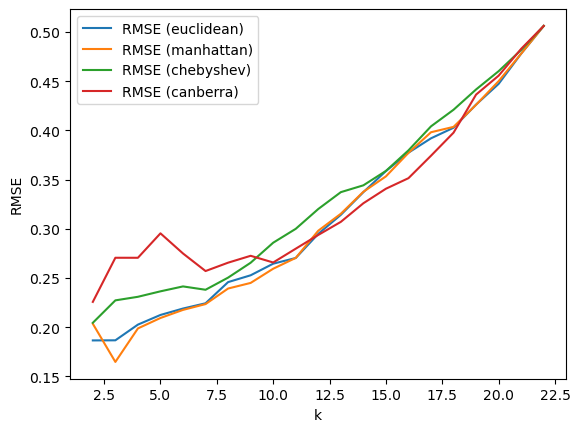

In [5]:
for metric in rmse_cv_scores:
    plt.plot(range(2, 23), rmse_cv_scores[metric], label=f'RMSE ({metric})')
plt.legend()
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

Według wykresu oraz wyliczonych wartości RMSE powinnam wybrać wartość k = 2 lub 3. Ze względu na regułę nieparzystości wybieram k = 3.

In [ ]:
def knn_stats(metric):
    """
    Evaluate K-Nearest Neighbors (KNN) regression model performance using specified metric.

    Parameters:
    metric (str): The distance metric to use for the KNN algorithm. Examples include 'euclidean', 'manhattan', etc.

    Returns:
    str: A formatted string containing the following performance metrics:
        - R2: Coefficient of determination (R-squared) for the training set.
        - RMSEc: Root Mean Squared Error for the training set.
        - Q2ext: Coefficient of determination (R-squared) for the validation set.
        - RMSEext: Root Mean Squared Error for the validation set.
    """
    knn = KNeighborsRegressor(n_neighbors=3, metric=metric)
    knn.fit(Xt, Yt)
    y_pred_t = knn.predict(Xt)
    y_pred_v = knn.predict(Xv)
    R2 = r2_score(y_pred_t, Yt)
    RMSEc = root_mean_squared_error(y_pred_t, Yt)
    Q2ext = r2_score(y_pred_v, Yv)
    RMSEext = root_mean_squared_error(y_pred_v, Yv)
    return (f'R2 = {R2}\n RMSEc = {RMSEc}\n Q2ext = {Q2ext}\n RMSEect = {RMSEext}')
for i in ('manhattan', 'euclidean', 'chebyshev', 'canberra'):
    print(f'For {i} method scores are:\n {knn_stats(i)} ')

For manhattan method scores are:
 R2 = 0.922127322440345
 RMSEc = 0.1356149908704501
 Q2ext = 0.883164614053437
 RMSEect = 0.13547316302956303 
For euclidean method scores are:
 R2 = 0.9308795530186199
 RMSEc = 0.12432545551450391
 Q2ext = 0.8681824452818329
 RMSEect = 0.12996238772130267 
For chebyshev method scores are:
 R2 = 0.8961368044593706
 RMSEc = 0.1362759320710585
 Q2ext = 0.7518295473882896
 RMSEect = 0.15804701597707957 
For canberra method scores are:
 R2 = 0.9075676846930225
 RMSEc = 0.15044275910829322
 Q2ext = 0.9339222539220708
 RMSEect = 0.10513809085268826 


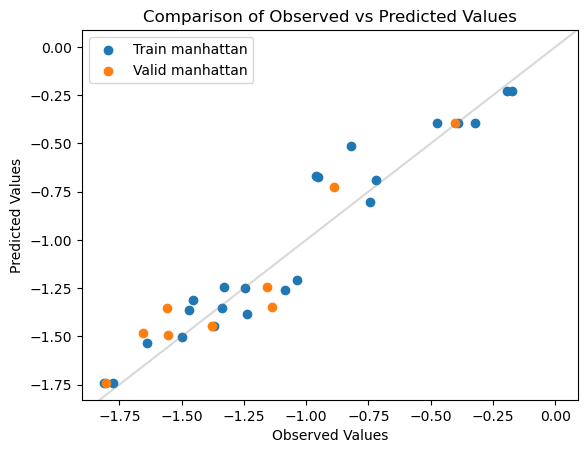

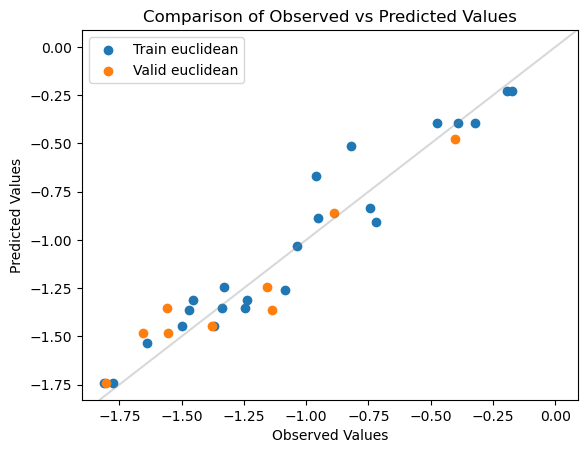

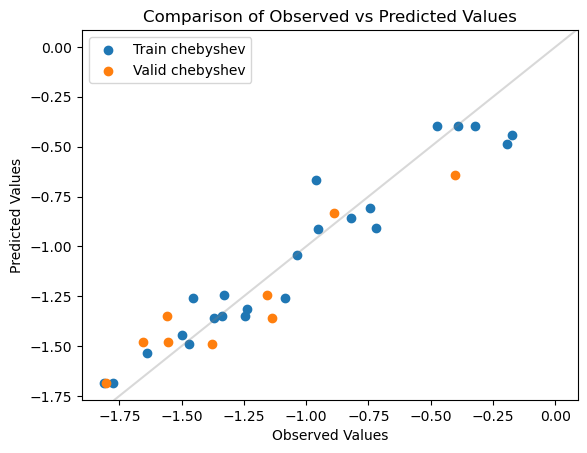

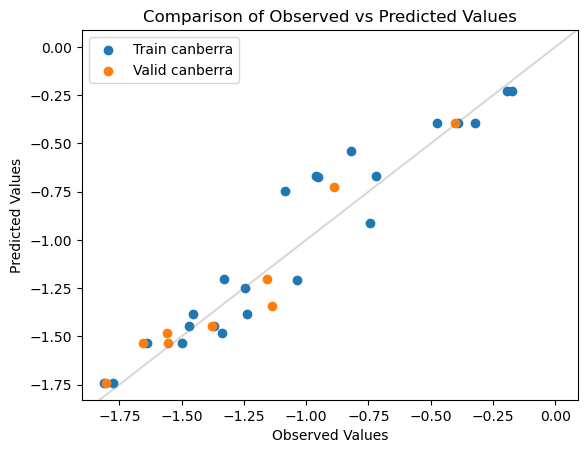

In [ ]:
# Scatter plot of training and test predictions
for metric in ('manhattan', 'euclidean', 'chebyshev', 'canberra'):
    knn = KNeighborsRegressor(n_neighbors=3, metric=metric)
    knn.fit(Xt, Yt)
    y_pred_t = knn.predict(Xt)
    y_pred_v = knn.predict(Xv)
    plt.scatter(Yt, y_pred_t, label=f'Train {metric}')
    plt.scatter(Yv, y_pred_v, label=f'Valid {metric}')

    # Add legend
    plt.legend()

    # Add a diagonal line for reference
    plt.axline((0, 0), slope=1, color="red", alpha=0.3)

    # Add title and labels
    plt.title("Comparison of Observed vs Predicted Values")
    plt.xlabel("Observed Values")
    plt.ylabel("Predicted Values")

    # Show plot
    plt.show()


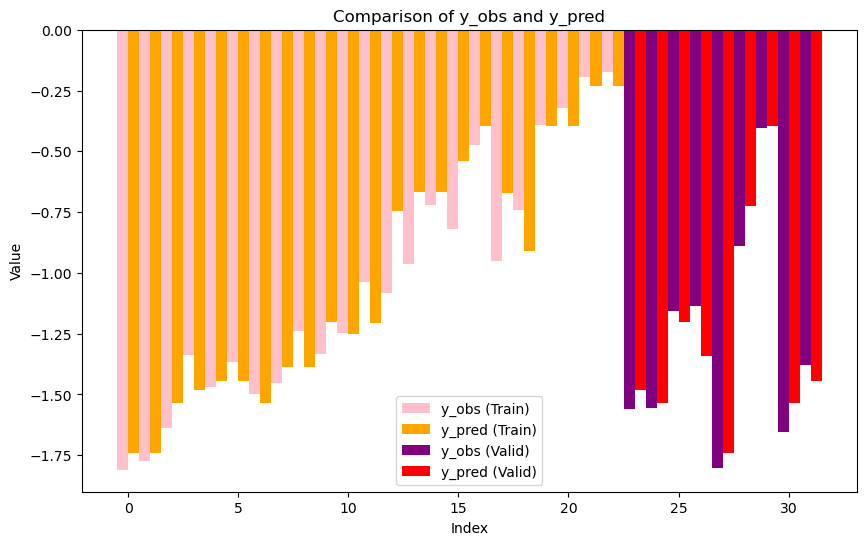

In [17]:
# Convert y_pred and y_obs to 1D arrays for easier plotting
y_pred_training_flat = y_pred_t.flatten()
y_obs_training_flat = Yt.squeeze().to_numpy()
y_pred_test_flat = y_pred_v.flatten()
y_obs_test_flat = Yv.squeeze().to_numpy()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5  # the width of the bars

# Plot y_obs and y_pred for training data side by side
ax.bar(np.arange(len(y_obs_training_flat)) - width/2, y_obs_training_flat, width, label='y_obs (Train)', color='pink')
ax.bar(np.arange(len(y_obs_training_flat)) + width/2, y_pred_training_flat, width, label='y_pred (Train)', color='orange')

# Plot y_obs and y_pred for test data side by side
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) - width/2, y_obs_test_flat, width, label='y_obs (Valid)', color='purple')
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) + width/2, y_pred_test_flat, width, label='y_pred (Valid)', color='red')

# Add labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Comparison of y_obs and y_pred')
ax.legend()

plt.show()

In [24]:
def knn_model_metrics_bar_comparision(weighted: bool) -> None:
    """
    Plots bar charts comparing KNN model metrics for different distance metrics.

    This function trains a K-Nearest Neighbors (KNN) regression model using different distance metrics
    and plots bar charts to compare the following metrics:
    - R2 (coefficient of determination) for training data
    - RMSE (Root Mean Squared Error) for training data
    - Q2 (coefficient of determination) for validation data
    - RMSE for validation data
    - Difference between R2 and Q2

    Parameters:
    weighted (bool): If True, the KNN model uses distance-weighted neighbors. If False, it uses uniform weights.

    Returns:
    None
    """
    metrics = ("euclidean", "manhattan", "chebyshev", "canberra")
    colors = sns.color_palette("flare", len(metrics))
    R2_values = []
    RMSEc_values = []
    Q2ext_values = []
    RMSEext_values = []
    diff_R2_Q2 = []

    for metric in metrics:
        if weighted:
            knn_model = KNeighborsRegressor(n_neighbors=3, metric=metric, weights='distance')
        else:
            knn_model = KNeighborsRegressor(n_neighbors=3, metric=metric)
        knn_model_fit = knn_model.fit(Xt, Yt)

        y_pred_train = knn_model_fit.predict(Xt)
        y_pred_valid = knn_model_fit.predict(Xv)

        R2 = r2_score(y_pred_train.flatten(), Yt)
        Q2 = r2_score(y_pred_valid.flatten(), Yv)

        R2_values.append(R2)
        RMSEc_values.append(root_mean_squared_error(y_pred_train.flatten(), Yt))
        Q2ext_values.append(Q2)
        RMSEext_values.append(root_mean_squared_error(y_pred_valid.flatten(), Yv))
        diff_R2_Q2.append(R2 - Q2)

    fig, axs = plt.subplots(3, 2, figsize=(12, 18))

    # Plot R2 for training data
    axs[0, 0].bar(metrics, R2_values, color=colors)
    axs[0, 0].set_title('R2 (Train)')
    axs[0, 0].set_ylabel('R2')

    # Plot RMSE for training data
    axs[0, 1].bar(metrics, RMSEc_values, color=colors)
    axs[0, 1].set_title('RMSE (Train)')
    axs[0, 1].set_ylabel('RMSE')

    # Plot Q2 for test data
    axs[1, 0].bar(metrics, Q2ext_values, color=colors)
    axs[1, 0].set_title('Q2 (Valid)')
    axs[1, 0].set_ylabel('Q2')

    # Plot RMSE for test data
    axs[1, 1].bar(metrics, RMSEext_values, color=colors)
    axs[1, 1].set_title('RMSE (Valid)')
    axs[1, 1].set_ylabel('RMSE')

    # Plot difference between R2 and Q2
    axs[2, 0].bar(metrics, diff_R2_Q2, color=colors)
    axs[2, 0].set_title('Difference between R2 and Q2')
    axs[2, 0].set_ylabel('R2 - Q2')

    # Hide the empty subplot
    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

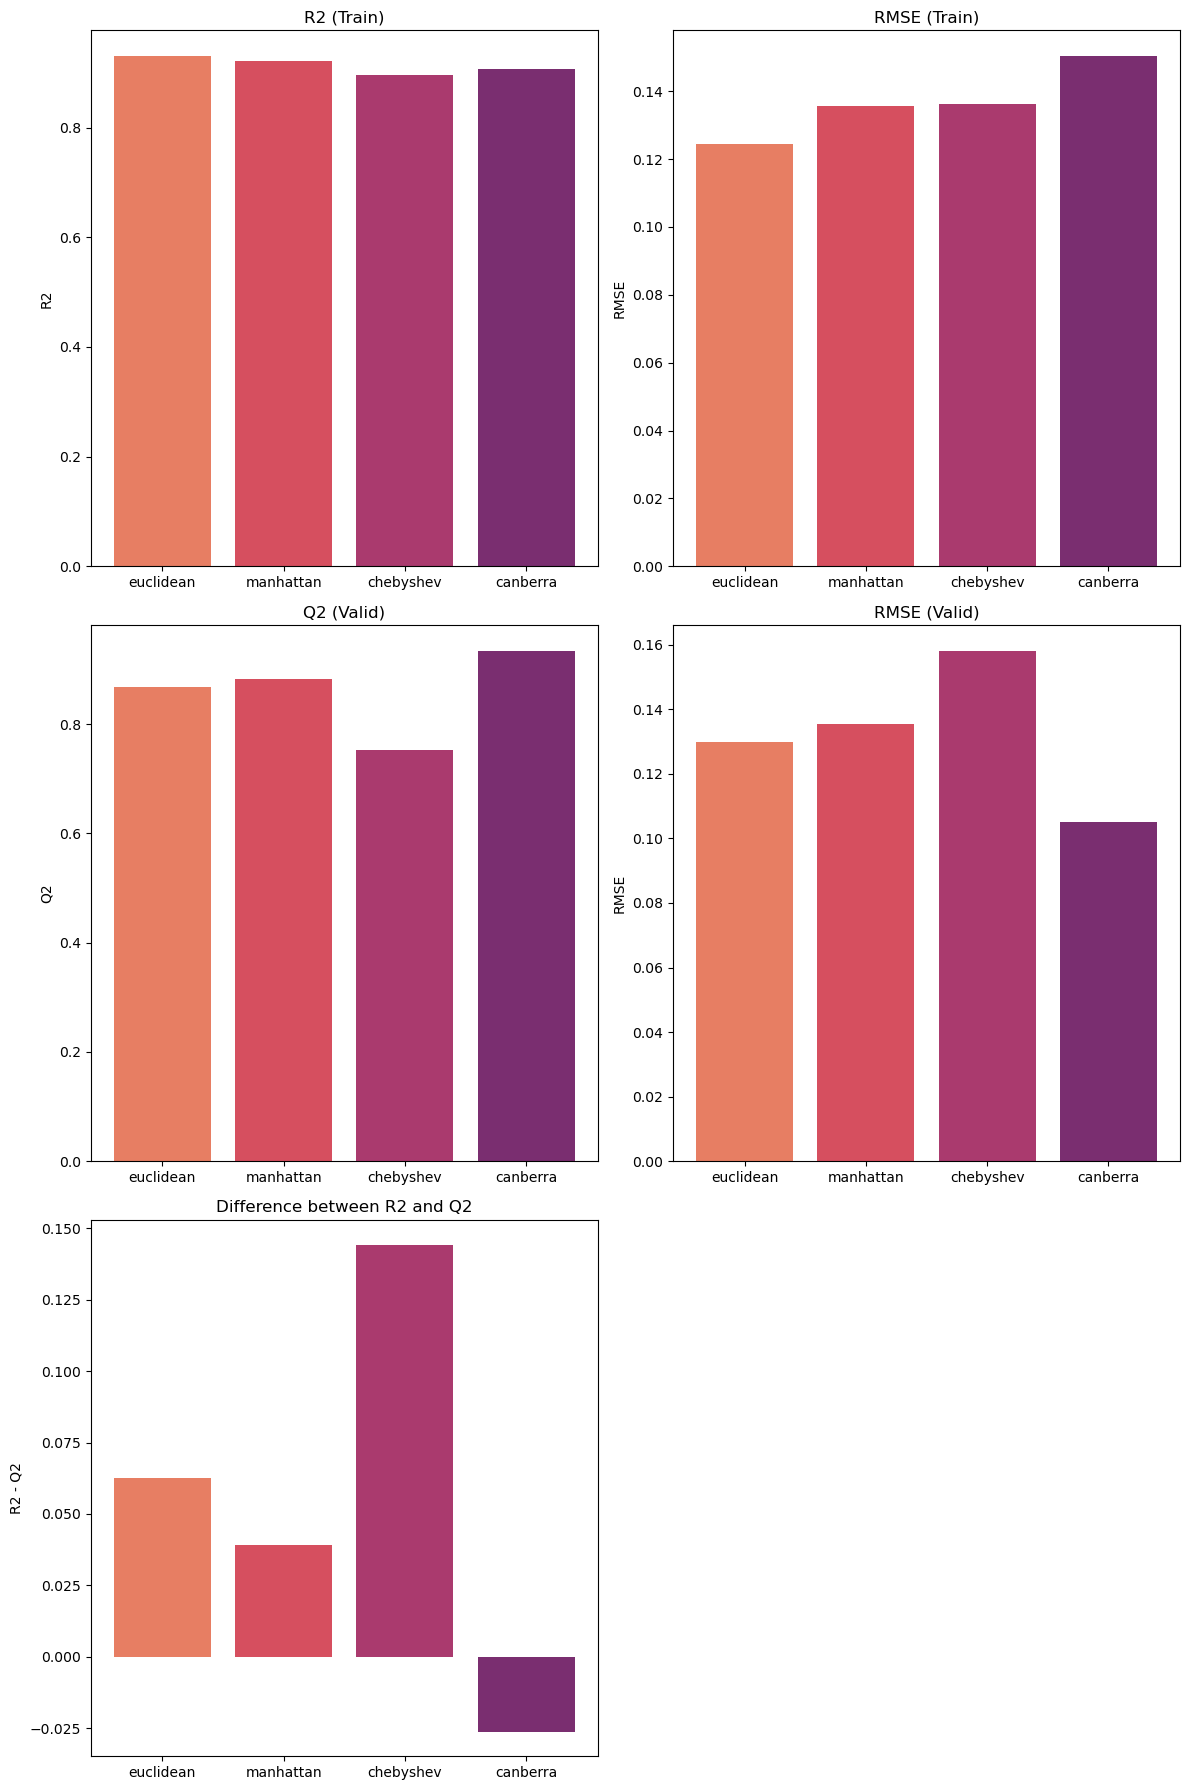

In [25]:
knn_model_metrics_bar_comparision(weighted=False)

In [26]:
def knn_stats_weighted(metric):
    knn = KNeighborsRegressor(n_neighbors=3, metric=metric, weights='distance')
    knn.fit(Xt, Yt)
    y_pred_t = knn.predict(Xt)
    y_pred_v = knn.predict(Xv)
    R2 = r2_score(y_pred_t, Yt)
    RMSEc = root_mean_squared_error(y_pred_t, Yt)
    Q2ext = r2_score(y_pred_v, Yv)
    RMSEext = root_mean_squared_error(y_pred_v, Yv)
    return (f'R2 = {R2}\n RMSEc = {RMSEc}\n Q2ext = {Q2ext}\n RMSEect = {RMSEext}')
for i in ('manhattan', 'euclidean', 'chebyshev', 'canberra'):
    print(f'For {i} method scores are:\n {knn_stats_weighted(i)} ')

For manhattan method scores are:
 R2 = 1.0
 RMSEc = 0.0
 Q2ext = 0.8935356302773477
 RMSEect = 0.12904346476815262 
For euclidean method scores are:
 R2 = 1.0
 RMSEc = 0.0
 Q2ext = 0.869534040707288
 RMSEect = 0.13277537302299516 
For chebyshev method scores are:
 R2 = 1.0
 RMSEc = 0.0
 Q2ext = 0.7862573874569132
 RMSEect = 0.1538387417665608 
For canberra method scores are:
 R2 = 1.0
 RMSEc = 0.0
 Q2ext = 0.9219687799751655
 RMSEect = 0.11317638421653425 


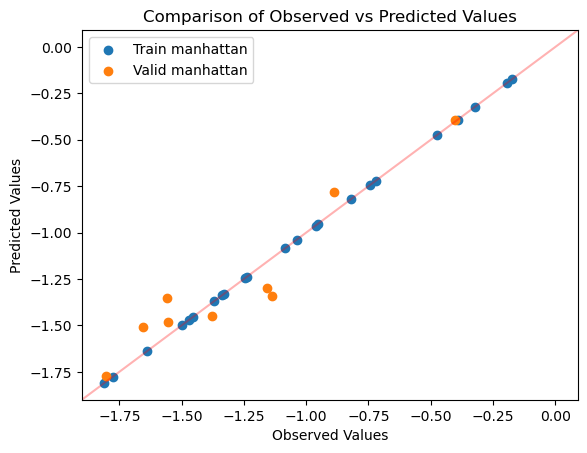

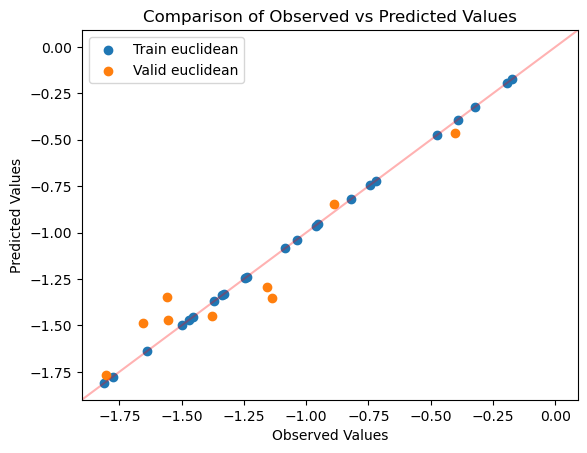

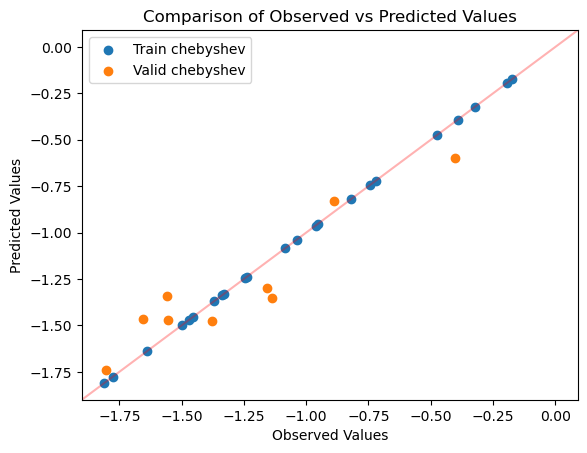

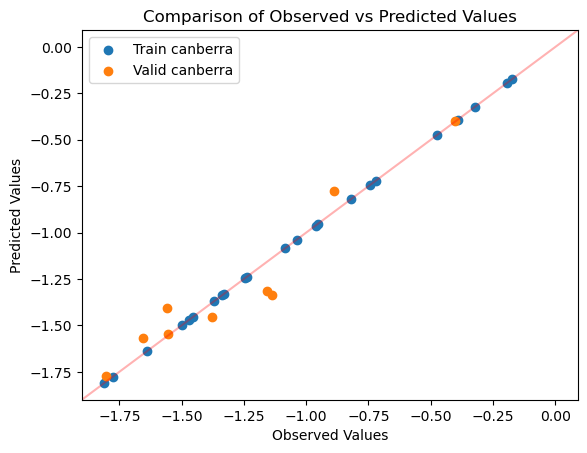

In [30]:
# Scatter plot of training and test predictions
for metric in ('manhattan', 'euclidean', 'chebyshev', 'canberra'):
    knn = KNeighborsRegressor(n_neighbors=3, metric=metric, weights='distance')
    knn.fit(Xt, Yt)
    y_pred_t = knn.predict(Xt)
    y_pred_v = knn.predict(Xv)
    plt.scatter(Yt, y_pred_t, label=f'Train {metric}')
    plt.scatter(Yv, y_pred_v, label=f'Valid {metric}')

    # Add legend
    plt.legend()

    # Add a diagonal line for reference
    plt.axline((0, 0), slope=1, color="red", alpha=0.3)

    # Add title and labels
    plt.title("Comparison of Observed vs Predicted Values")
    plt.xlabel("Observed Values")
    plt.ylabel("Predicted Values")

    # Show plot
    plt.show()

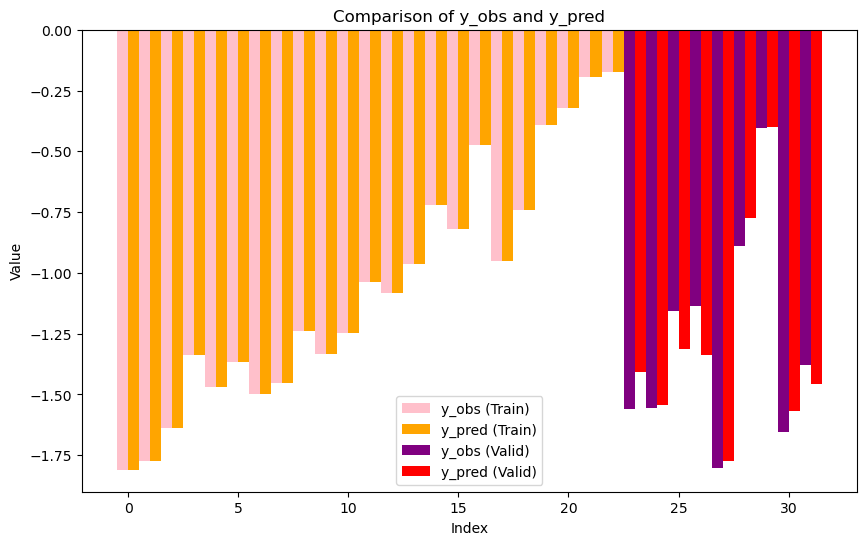

In [28]:
# Convert y_pred and y_obs to 1D arrays for easier plotting
y_pred_training_flat = y_pred_t.flatten()
y_obs_training_flat = Yt.squeeze().to_numpy()
y_pred_test_flat = y_pred_v.flatten()
y_obs_test_flat = Yv.squeeze().to_numpy()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5  # the width of the bars

# Plot y_obs and y_pred for training data side by side
ax.bar(np.arange(len(y_obs_training_flat)) - width/2, y_obs_training_flat, width, label='y_obs (Train)', color='pink')
ax.bar(np.arange(len(y_obs_training_flat)) + width/2, y_pred_training_flat, width, label='y_pred (Train)', color='orange')

# Plot y_obs and y_pred for test data side by side
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) - width/2, y_obs_test_flat, width, label='y_obs (Valid)', color='purple')
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) + width/2, y_pred_test_flat, width, label='y_pred (Valid)', color='red')

# Add labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Comparison of y_obs and y_pred')
ax.legend()

plt.show()

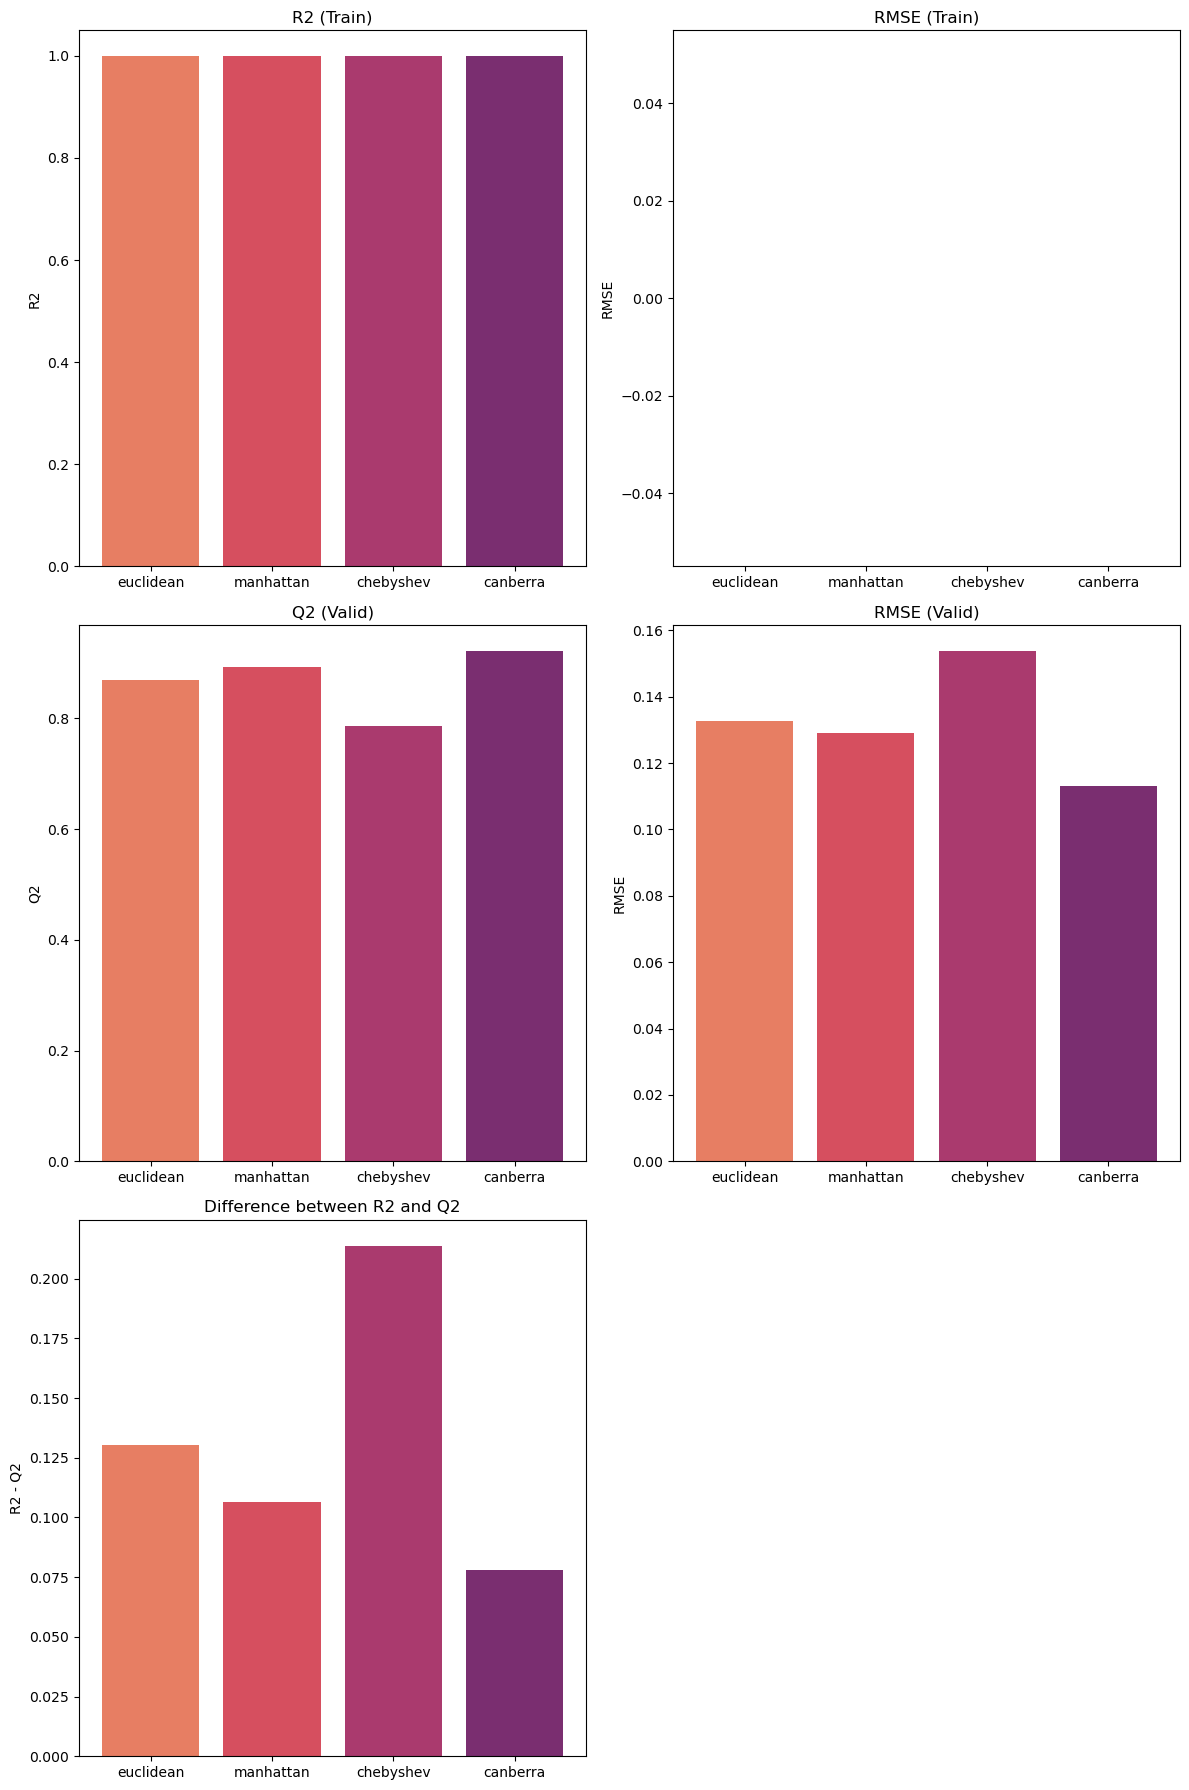

In [31]:
knn_model_metrics_bar_comparision(True)

Biorąc pod uwagę zwykłe KNN i ważone KNN to drugie poradziło sobie lepiej. Wszystkie jego statystyki R2 = 1, a RMSEc = 0. Porównując wszytskie mtody Canberra ma statystyki wyjściowe najlepsze Q2ext ok 0.922, RMSEect ok. 0.113. 